In [1]:
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
data_dir = Path("../../data/processed")
X_train = pd.read_parquet(data_dir / "X_train.parquet")
X_val = pd.read_parquet(data_dir / "X_val.parquet")
y_train = pd.read_parquet(data_dir / "y_train.parquet").squeeze()
y_val = pd.read_parquet(data_dir / "y_val.parquet").squeeze()
X_test = pd.read_parquet(data_dir / "X_test.parquet")
test_ids = pd.read_parquet(data_dir / "test_ids.parquet")['id']

In [3]:
model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=6,
    n_jobs=-1,              # Использовать все ядра процессора
    random_state=42,
    early_stopping_rounds=100
)

In [4]:
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=200
)

[0]	validation_0-rmse:0.04872
[200]	validation_0-rmse:0.01849
[400]	validation_0-rmse:0.01848
[600]	validation_0-rmse:0.01848
[800]	validation_0-rmse:0.01848
[1000]	validation_0-rmse:0.01848
[1021]	validation_0-rmse:0.01848


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,None


In [5]:
y_pred = model.predict(X_val)
y_pred = np.clip(y_pred, 0, 1)

print(f"Validation R2: {r2_score(y_val, y_pred):.5f}")

Validation R2: 0.86828


<Figure size 1000x800 with 0 Axes>

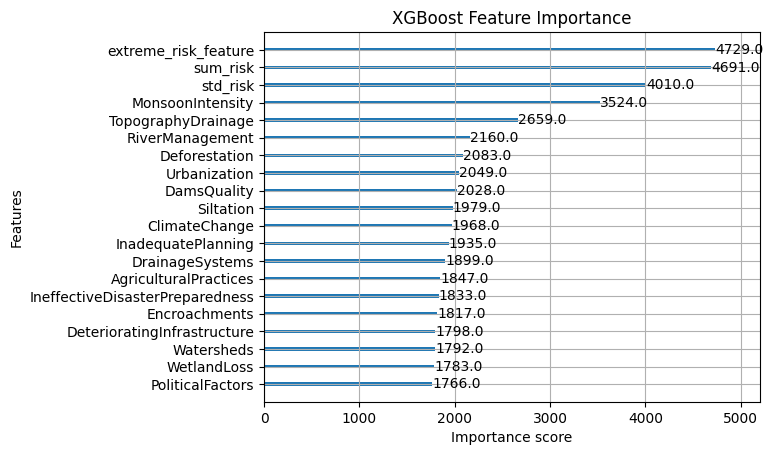

In [6]:
from xgboost import plot_importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()

In [7]:
test_pred = model.predict(X_test)
test_pred = np.clip(test_pred, 0, 1)

submission = pd.DataFrame({'id': test_ids, 'FloodProbability': test_pred})
submission.to_csv(data_dir / "submission_xgboost.csv", index=False)
print("Saved submission_xgboost.csv")

Saved submission_xgboost.csv
